# Finding base station neighbours via the Delaunay triangulation

We will reuse the work of Delphine PAQUIRY to find base stations' neighbours.

In [1]:
# Importation of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay


In [2]:
# Importing database
df = pd.read_csv("../database/data.csv", sep=";", decimal=",")
df.head()

,code_op,nom_op,num_site,id_site_partage,id_station_anfr,x,y,latitude,longitude,nom_reg,...,site_ZB,site_DCC,site_strategique,site_capa_240mbps,date_ouverturecommerciale_5g,site_5g_700_m_hz,site_5g_800_m_hz,site_5g_1800_m_hz,site_5g_2100_m_hz,site_5g_3500_m_hz
0,20801,Orange,00000001A1,NaN,0802290015,687035.0,6985761.0,49.97028,2.81944,Hauts-de-France,...,0,0,0,0,NaN,0,0,0,0,0
1,20801,Orange,00000001B1,NaN,0642290151,422853.0,6249263.0,43.28861,-0.41389,Nouvelle-Aquitaine,...,0,0,0,1,2020-12-14,0,0,0,1,0
2,20801,Orange,00000001B2,NaN,0332290026,416932.0,6422196.0,44.84112,-0.58333,Nouvelle-Aquitaine,...,0,0,0,1,2021-02-22,0,0,0,0,1
3,20801,Orange,00000001B3,NaN,0472290005,511106.0,6349234.0,44.21666,0.63556,Nouvelle-Aquitaine,...,0,0,0,1,NaN,0,0,0,0,0
4,20801,Orange,00000001C1,NaN,0512290147,836824.0,6889450.0,49.09028,4.87333,Grand Est,...,0,0,0,1,NaN,0,0,0,0,0


## Useful methods

In [3]:
def plot_delaunay(points, delaunay_triangulation):
    """ Plots a Delaunay triangulation
        IN:
            points: Coordinates of points to triangulate (ndarray)
            delaunay_triangulation: Result of the Delaunay triangulation
        OUT: 
            plot
    """
    plt.triplot(points[:,0], points[:,1], delaunay_triangulation.simplices, linewidth=0.3)
    plt.plot(points[:,0], points[:,1], 'o', markersize=3, c="green")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

## First try on the Gard county

### Creation of the dataframe

In [4]:
department = "Gard"

In [5]:
df_gard = df.loc[df['nom_dep'] == department]
df_gard = df_gard.drop(columns=["code_op", "id_site_partage", "id_station_anfr", "nom_reg", "nom_dep", "insee_dep", "insee_com", "site_2g", "site_3g", "site_4g", "site_5g", "mes_4g_trim", "site_ZB", "site_DCC", "site_strategique", "site_capa_240mbps", "date_ouverturecommerciale_5g", "site_5g_700_m_hz", "site_5g_800_m_hz", "site_5g_1800_m_hz", "site_5g_2100_m_hz", "site_5g_3500_m_hz"])
df_gard.head()

,nom_op,num_site,x,y,latitude,longitude,nom_com
15,Orange,00000001J4,842967.0,6319501.0,43.96000,4.78139,Villeneuve-lès-Avignon
16,Orange,00000001K2,831610.0,6351822.0,44.25305,4.64833,Pont-Saint-Esprit
84,Orange,00000003K2,810137.0,6304429.0,43.83028,4.36917,Nîmes
351,Orange,00000010K2,817019.0,6294827.0,43.74278,4.45250,Bellegarde
391,Orange,00000011K2,801064.0,6295942.0,43.75527,4.25472,Uchaud


### Base stations' number

In [6]:
providers = list(np.unique(df_gard["nom_op"]))
nb_pro = len(providers)

df_proPerDep = pd.DataFrame({
    "nom_dep" : department,
    "Free Mobile"   : [None],
    "SFR"   : [None],
    "Orange"   : [None],
    "Bouygues Telecom"   : [None],
    "Total"   : [None]
})

for pro in providers: # number of sites per provider
    count = list(df_gard["nom_op"]).count(pro)
    df_proPerDep.loc[df_proPerDep["nom_dep"]==department, pro] = count
df_proPerDep.loc[df_proPerDep["nom_dep"]==department, "Total"] = len(df_gard["num_site"])

In [7]:
df_proPerDep

,nom_dep,Free Mobile,SFR,Orange,Bouygues Telecom,Total
0,Gard,270,346,372,331,1319


### Delaunay triangulation on Free Mobile stations

In [8]:
# Selecting the provider : Free Mobile
df_gard_free = df_gard.loc[df['nom_op'] == "Free Mobile"]
df_gard_free = df_gard_free.drop(columns=['nom_op'])
df_gard_free.head()

,num_site,x,y,latitude,longitude,nom_com
85288,12204_002,721664.0,6332720.0,44.09315,3.27055,Revens
89818,30001_001,803995.0,6331865.0,44.07809,4.29843,Aigaliers
89819,30003_004,797068.0,6276765.0,43.58330,4.20149,Aigues-Mortes
89820,30003_005,796742.0,6274926.0,43.56680,4.19711,Aigues-Mortes
89821,30006_001,796886.0,6288301.0,43.68711,4.20141,Aimargues


In [9]:
# Creation of points couples for Delaunay
df_gard_free_points = np.array(df_gard_free[['longitude', 'latitude']])

In [10]:
delaunay_gard_free = Delaunay(df_gard_free_points)

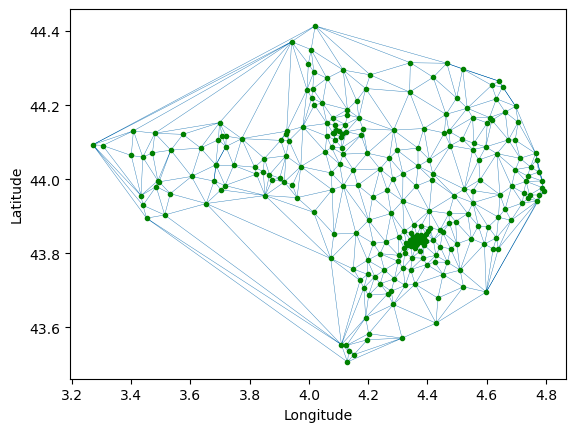

In [11]:
plot_delaunay(df_gard_free_points, delaunay_gard_free)

### Addition of a distance condition

In [12]:
delaunay_gard_free.simplices

array([[174,  93,   0],
       [ 68, 101,   0],
       [ 93,  68,   0],
       ...,
       [132, 142, 136],
       [142, 151, 141],
       [136, 142, 141]], dtype=int32)

In [13]:
import networkx as nx
from itertools import combinations

In [14]:
tmp = combinations(delaunay_gard_free.simplices[1], 2)
tmp

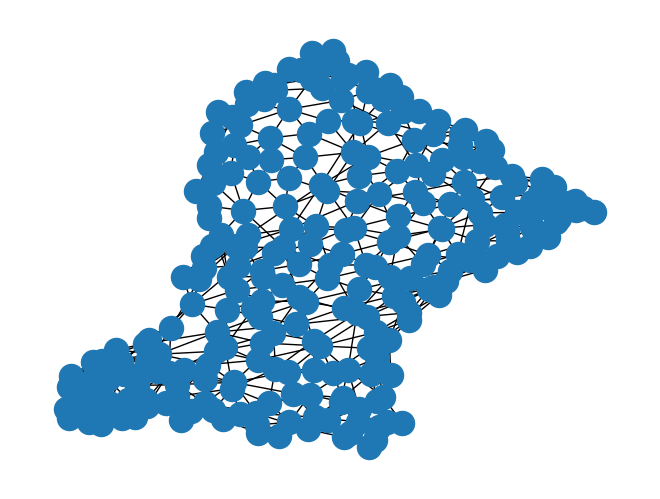

In [15]:
G = nx.Graph()
G.add_nodes_from(range(len(df_gard_free)))

for simplex in delaunay_gard_free.simplices:
    G.add_edges_from(combinations(simplex, 2))
# for i, node in enumerate(G.nodes()):
#     G.nodes[node]['num_site'] = df_gard_free.iloc[i]['num_site']    
# nx.set_node_attributes(G, pos, 'pos')

nx.draw(G)

## Big Delaunay on France
Only Free Mobile

In [16]:
# Selecting the provider : Free Mobile
df_free = df.loc[df['nom_op'] == "Free Mobile"]
df_free = df_free.drop(columns=['nom_op'])
df_free.head()

,code_op,num_site,id_site_partage,id_station_anfr,x,y,latitude,longitude,nom_reg,nom_dep,...,site_ZB,site_DCC,site_strategique,site_capa_240mbps,date_ouverturecommerciale_5g,site_5g_700_m_hz,site_5g_800_m_hz,site_5g_1800_m_hz,site_5g_2100_m_hz,site_5g_3500_m_hz
82661,20815,01002_001,ZPB01412,0010990247,887004.0,6548221.0,46.00797,5.41702,Auvergne-Rhône-Alpes,Ain,...,1,0,0,0,NaN,0,0,0,0,0
82662,20815,01004_001,NaN,0010990004,883573.0,6541985.0,45.95278,5.37028,Auvergne-Rhône-Alpes,Ain,...,0,0,0,1,2020-12-15,1,0,0,0,0
82663,20815,01004_002,NaN,0010990041,881600.0,6544701.0,45.97775,5.34586,Auvergne-Rhône-Alpes,Ain,...,0,0,0,1,2021-02-16,1,0,0,0,0
82664,20815,01004_005,NaN,0010990393,881006.0,6543173.0,45.96416,5.33761,Auvergne-Rhône-Alpes,Ain,...,0,0,0,1,2023-09-25,1,0,0,0,0
82665,20815,01005_001,NaN,0010990281,847469.0,6544900.0,45.98782,4.90522,Auvergne-Rhône-Alpes,Ain,...,0,0,0,1,2020-12-15,1,0,0,0,0


In [17]:
# Creation of points couples for Delaunay
df_free_points = np.array(df_free[['longitude', 'latitude']])

In [18]:
delaunay_free = Delaunay(df_free_points)

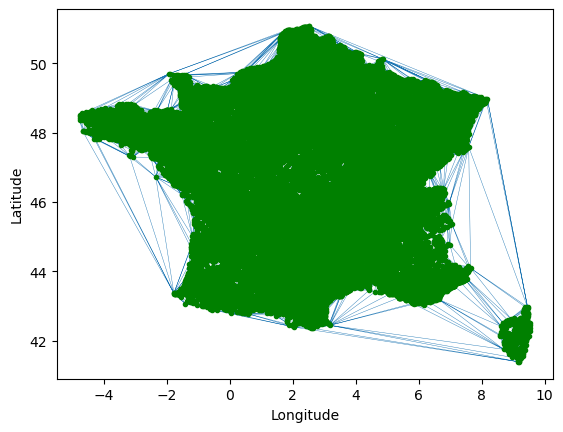

In [19]:
plot_delaunay(df_free_points, delaunay_free)